### Gráfico de Violín (violin plot)
Visualización estadística que combina un boxplot con una estimación de densidad kernel (KDE) para mostrar la distribución completa de los datos en una o más categorías.

Es especialmente útil cuando quieres ver no solo los resúmenes estadísticos (como en un boxplot), sino también la forma de la distribución: si es bimodal, simétrica, sesgada, etc.

🎯 ¿Para qué sirve?
- Mostrar la forma completa de la distribución
- Además de mostrar cuartiles y outliers, el violín muestra dónde se concentran más los datos (zonas anchas = alta densidad).
- Comparar distribuciones entre grupos
- Ideal para ver si dos grupos tienen distribuciones similares o muy distintas.
- Detectar modas múltiples
- El ancho del violín en cada punto indica la densidad de datos en ese valor.
- Suele incluir marcadores internos (opcionalmente):
- Una línea blanca: el rango intercuartílico (IQR).
- Un punto blanco: la mediana.
- Es simétrico: se dibuja a ambos lados del eje central para mejor percepción visual (aunque solo representa una distribución).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("data/city_temperature.csv", usecols=["City", "Year", "AvgTemperature"], low_memory=False)
df['AvgTemperature'] = (df['AvgTemperature'] - 32) * 5 / 9 #! A Celcius
chicago = df[(df['City'] == 'Chicago') & (df['Year'] >= 2010)]
data = chicago['AvgTemperature']

##### Histograma

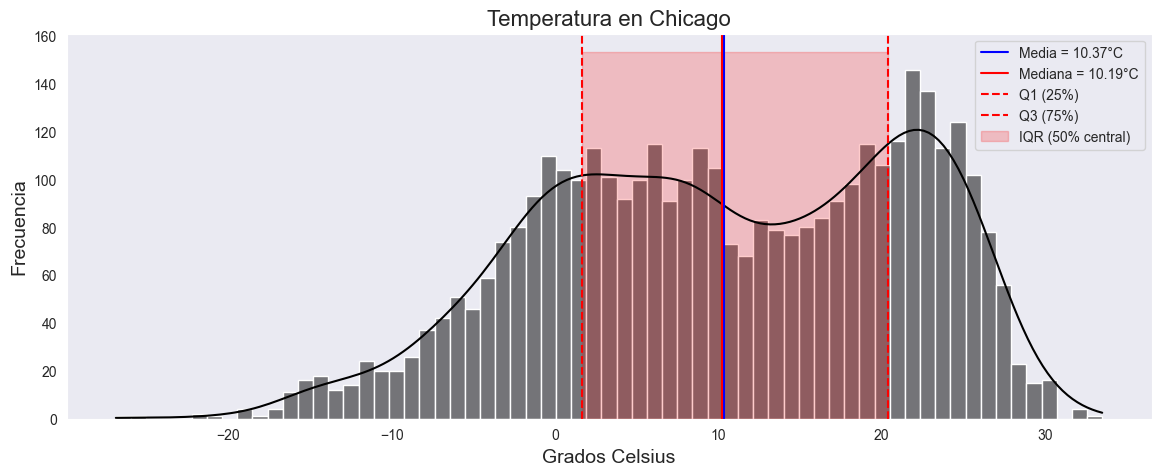

In [5]:
sns.set_style("dark")  
plt.figure(figsize=(14, 5))
sns.histplot(data, kde=True, bins=65, color='black')

media = data.mean()
mediana = data.median()
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

plt.axvline(media, color='blue', linestyle='solid', label=f'Media = {media:.2f}°C')
plt.axvline(mediana, color='red', linestyle='solid', label=f'Mediana = {mediana:.2f}°C')

#! IQR
plt.axvline(q1, color='red', linestyle='--', label='Q1 (25%)')
plt.axvline(q3, color='red', linestyle='--', label='Q3 (75%)')
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], q1, q3, color='red', alpha=0.2, label='IQR (50% central)')

plt.title('Temperatura en Chicago', fontsize=16)
plt.xlabel('Grados Celsius', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend()
plt.show()         

Distribución general:
- Las temperaturas están distribuidas de forma asimétrica, con una cola hacia el lado izquierdo (más frío).
- El pico más alto está alrededor de los 20–25°C, lo que sugiere que es la moda.

Medidas centrales:
- Media = 10.37°C (línea azul): promedio de todas las temperaturas.
- Mediana = 10.19°C (línea roja): valor central; casi igual a la media, lo que indica poca asimetría extrema.

Rango intercuartílico (IQR):
- Q1 (25%) ≈ 2°C (línea roja punteada izquierda).
- Q3 (75%) ≈ 20°C (línea roja punteada derecha).
- IQR = 20°C – 0°C = 20°C: el 50% central de las temperaturas está entre 2°C y 20°C.

La mayoría de los días tienen temperaturas entre 0°C y 20°C. Hay temperaturas extremas (hasta ~-25°C y ~35°C), pero son poco frecuentes. En Chicago, la temperatura típica oscila entre 0°C y 20°C, con una mediana de 10.19°C. Aunque hay días muy fríos o calurosos, la mayoría de los datos están concentrados en ese rango central. 

El histograma parece mostrar una tendencia bimodal, aunque no es extremadamente clara.
- Hay un pico principal alrededor de 20–25°C (la mayoría de los días).
- Hay un segundo pico más bajo pero notable alrededor de 0–5°C.
- Entre ambos hay un valle (menos frecuencia), lo que sugiere dos grupos o estaciones dominantes:
- Un grupo de temperaturas más frías (~0–5°C) → posiblemente invierno/primavera temprana.
- Un grupo de temperaturas más cálidas (~20–25°C) → verano.
- Esto es consistente con el clima de Chicago: inviernos fríos y veranos calurosos, con menos días en temperaturas intermedias (como primavera/otoño). 

##### Boxplot

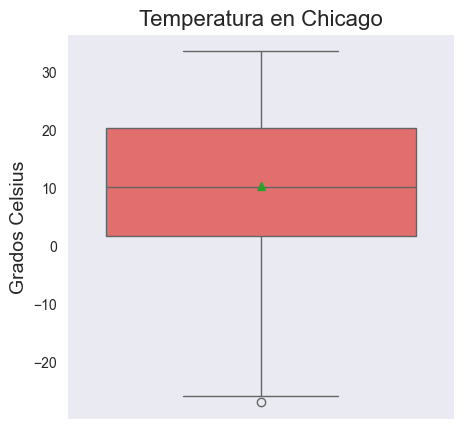

In [6]:
sns.set_style("dark")  
plt.figure(figsize=(5, 5))
sns.boxplot(y=data, color="#f75a5a", showmeans=True)

plt.title('Temperatura en Chicago', fontsize=16)
plt.ylabel('Grados Celsius', fontsize=14)
plt.show()         

- Eje Y: Temperatura en Grados Celsius (desde -20°C hasta 30°C).
- Caja roja: Representa el rango intercuartílico (IQR) → el 50% central de los datos.
- Línea horizontal dentro de la caja: Mediana ≈ 10°C .
- Triángulo verde: Media ≈ 10°C.

Bigotes (líneas verticales):
- Extremo superior: máximo no atípico ≈ 30°C.
- Extremo inferior: mínimo no atípico ≈ -20°C.
- Círculo vacío (○) en la parte inferior: Valor atípico (outlier) → una temperatura muy baja, probablemente menor a -20°C.

La mediana y la media están cerca (~10°C), lo que sugiere que la distribución no está muy sesgada (aunque el outlier inferior podría afectarla ligeramente).

Dispersión:
- El IQR (caja) va aproximadamente desde ~5°C a ~18°C, lo que significa que el 50% de los días tienen temperaturas entre esos valores.
- El rango total (sin outliers) va de ~ -20°C a ~30°C, mostrando una gran variabilidad estacional.

Valores extremos:
- Hay al menos un outlier hacia abajo (temperatura muy fría), lo cual es común en climas continentales como el de Chicago (inviernos severos).

Aunque el boxplot no muestra la forma exacta, la posición de la mediana (casi en el centro de la caja) sugiere simetría moderada.
Pero el outlier y el largo bigote inferior indican una cola hacia el frío (sesgo negativo leve).

##### Violin

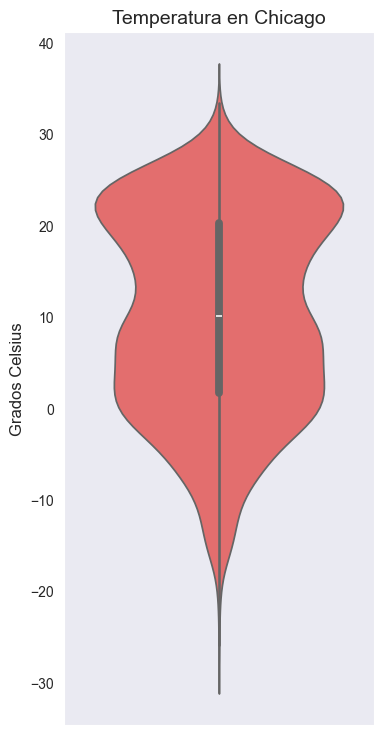

In [24]:
sns.set_style("dark")  
plt.figure(figsize=(4, 9))
sns.violinplot(y=data, color="#f75a5a")

plt.title('Temperatura en Chicago', fontsize=14)
plt.ylabel('Grados Celsius', fontsize=12)
plt.show()       

- Eje Y: Temperatura en Grados Celsius (desde -30°C hasta 40°C).
- Forma del violín (rojo): Representa la densidad de los datos.

Las partes más anchas = más frecuentes (más días con esa temperatura).
Las partes más delgadas = menos frecuentes.

Boxplot interno: Línea gris vertical dentro del violín que muestra:
- Caja: Rango intercuartílico (IQR) → el 50% central.
- Línea blanca dentro de la caja: Mediana ≈ 10°C.
- Bigotes: Rango de valores no atípicos (≈ -20°C a 30°C).

Forma de la distribución:
- No es simétrica → tiene dos "bultos" o modas: Uno alrededor de ~0–5°C (temperaturas frías, posiblemente invierno/primavera). Otro más grande alrededor de ~20–25°C (temperaturas cálidas, verano). Esto confirma lo que vimos en el histograma: la distribución es bimodal.

Concentración de datos:
- La mayor densidad está entre ~15°C y ~25°C → es donde hay más días.
- Hay una segunda concentración menor entre ~0°C y ~10°C → días fríos pero comunes.

Colas extremas:
- El violín se estrecha mucho hacia abajo, llegando a ~ -30°C → indica que hay días muy fríos, pero son raros.
- Hacia arriba, también se estrecha, llegando a ~35°C → días muy calurosos, poco frecuentes.

Mediana y dispersión:
- La mediana (~10°C) está ligeramente por debajo del centro de la masa de datos, lo que refleja la cola hacia el frío (sesgo negativo leve).
- El IQR (caja gris) va de ~5°C a ~18°C → el 50% central de las temperaturas.